In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
sns.set(color_codes=True)

In [28]:
results_df_1 = pd.read_csv('HyperParameter_Results.csv')
results_df_2 = pd.read_csv('HyperParameter_Results_2.csv')
results_df = pd.concat([results_df_1, results_df_2])
del results_df['Unnamed: 0']

## Section 1: Global Properties

First let's look at the distribution of AUC's. As we can see the average AUC (of the final five training iterations) is somewhat bi-modal. This indicates that some factor is driving a fundamentally different behavior when you train a graph embedding.

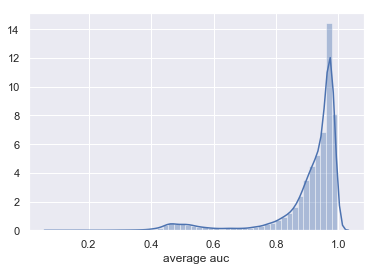

In [29]:
sns.distplot(results_df['average auc'])

### Correlation Matrix

Ok so then let's look at each of the individual factors and their linear (this is obviously problematic, but we'll start here) relationship to the average AUC. Some interesting things to note here, number of distinct cliques (or the number of communities) has a very strong effect on the average AUC. If you recall from the training code, the data generating process includes instantiating C cliques and for each of those cliques there are N nodes and M edges. Then there is a process of connecting disparate cliques (that is what connectivity between cliques captures). 

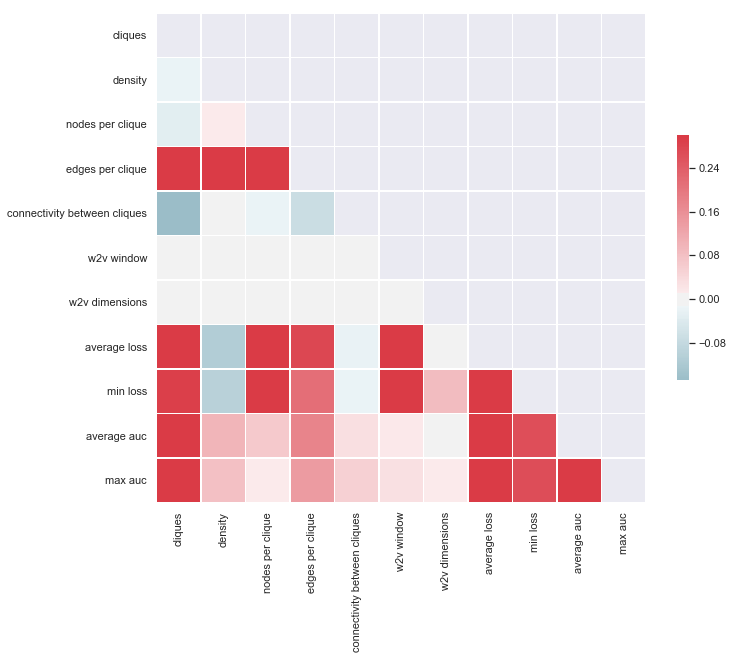

In [30]:
corr = results_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

What we see when we plot the density against the average AUC is a couple of interesting things to note.

1. Clearly there is a problem learning embeddings for a graph with a single clique. This means if there are no distinct communities within a larger graph it is hard to find an embedding space that separates groups of entities. This can be seen by the consistently bad performance of the yellow dots

2. Performance is bad with very sparse graphs and very dense graphs.

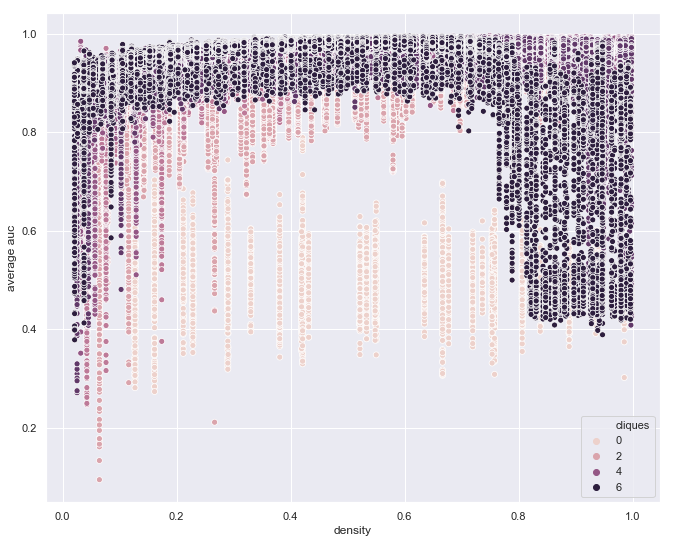

In [38]:
f, ax = plt.subplots(figsize=(11, 9))
sns.scatterplot(x=results_df['density'], y=results_df['average auc'], hue=results_df['cliques'])

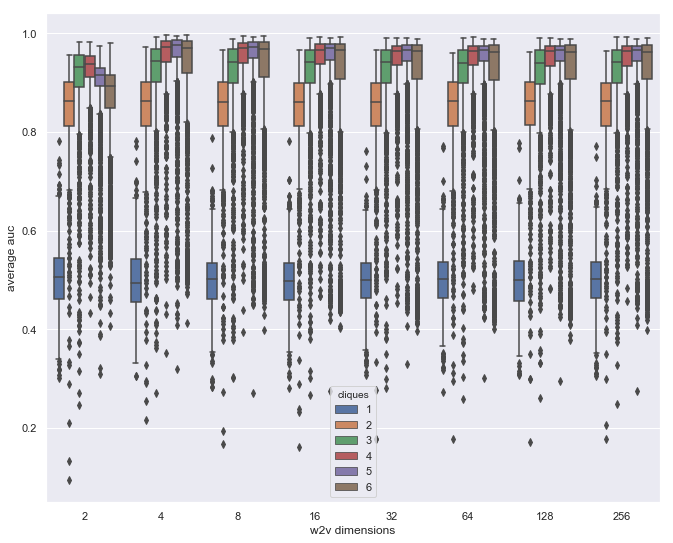

In [42]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x=results_df['w2v dimensions'], y=results_df['average auc'], hue=results_df['cliques'])

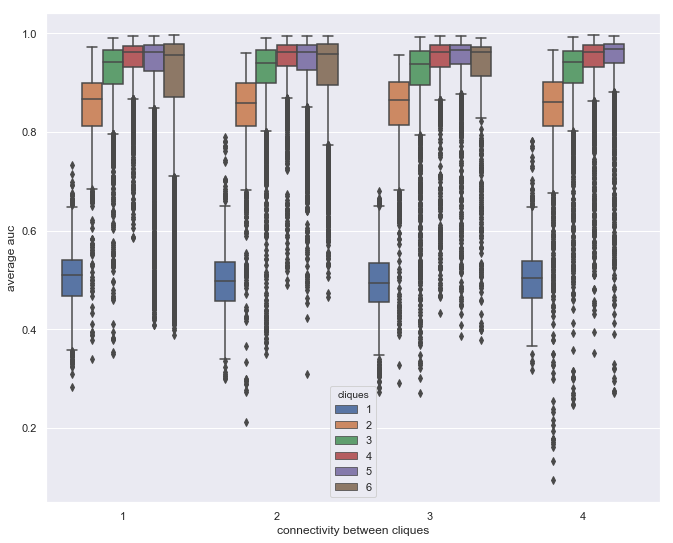

In [41]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x=results_df['connectivity between cliques'], y=results_df['average auc'], hue=results_df['cliques'])

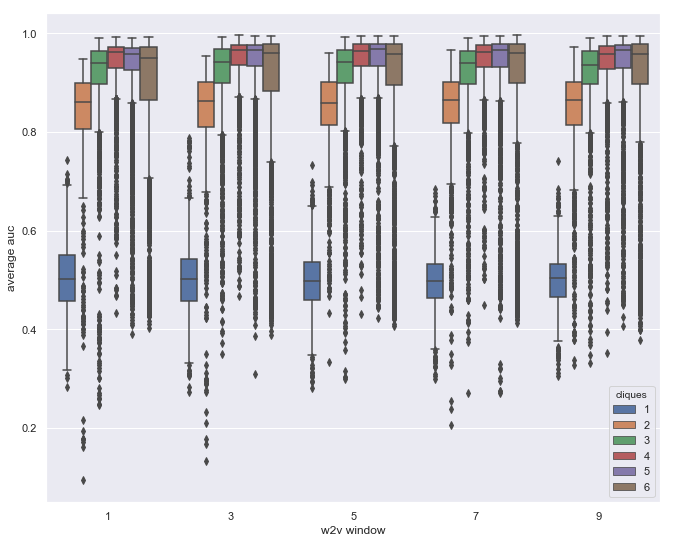

In [43]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x=results_df['w2v window'], y=results_df['average auc'], hue=results_df['cliques'])

In [61]:
middle_density = results_df[(results_df['density'] < 0.75) & (results_df['density'] > 0.2) & (results_df['cliques'] > 2)] 

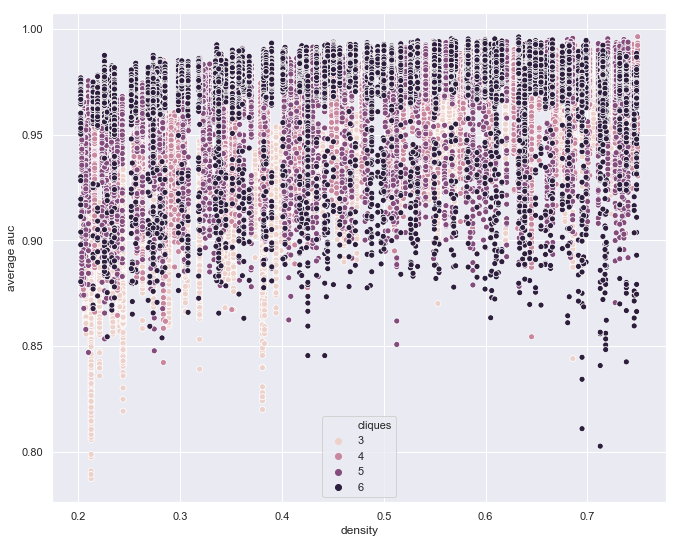

In [62]:
f, ax = plt.subplots(figsize=(11, 9))
sns.scatterplot(x=middle_density['density'], y=middle_density['average auc'], hue=middle_density['cliques'])

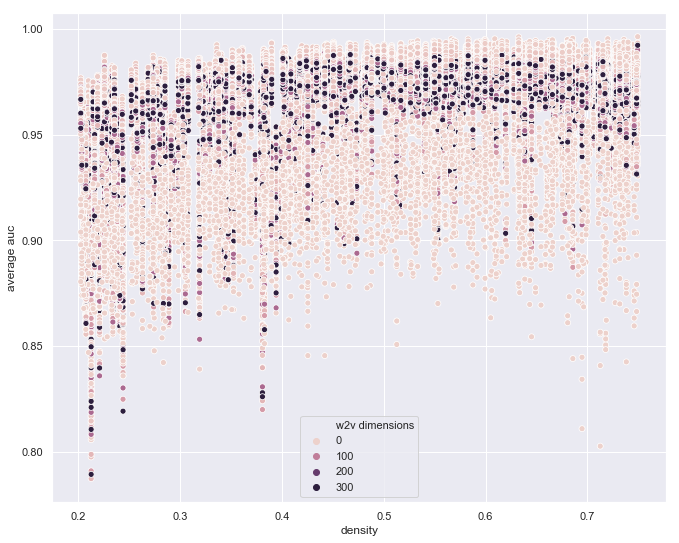

In [65]:
f, ax = plt.subplots(figsize=(11, 9))
sns.scatterplot(x=middle_density['density'], y=middle_density['average auc'], hue=middle_density['w2v dimensions'])

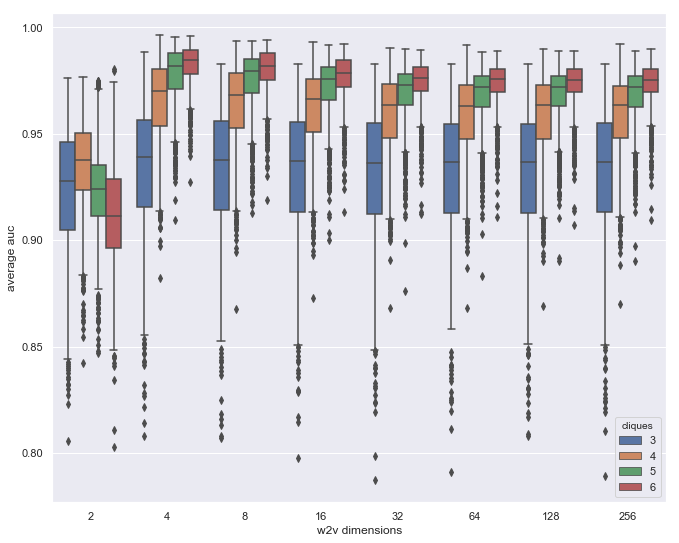

In [64]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x=middle_density['w2v dimensions'], y=middle_density['average auc'], hue=middle_density['cliques'])